# Purpose

The purpose of this notebook is to look into how much LastFM data was matched to Spotify 
## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import swifter
import os

## Prepping Data

In [2]:
data = pd.read_parquet('../data/KidListeningEventsWithAudioFeatures.gzip.parquet')
data['Has Audio Features'] = (data['Loudness'].isna() == False)
data

,Age,Education Level,Artist,Album,Track,User Id,Artist Id,Album Id,Track Id,Event Unixtime,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration Ms,Time Signature,Has Audio Features
0,16,HS,I BREAK HORSES,CHIAROSCURO,FAITH,15397460,15610,33142,99816,1391098195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,16,HS,TAYLOR SWIFT,FEARLESS,FEARLESS,15397460,3744,30727,99833,1374858428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,16,HS,HIM,TEARS ON TAPE,W.L.S.T.D.,15397460,10028,33156,99851,1369547268,...,1.0,0.0384,0.014800,0.15400,0.3680,0.112,134.019,252427.0,4.0,True
3,16,HS,AMARANTHE,THE NEXUS,INFINITY,15397460,104,33147,99875,1365511561,...,0.0,0.1740,0.000066,0.00000,0.1050,0.407,180.104,185400.0,4.0,True
4,16,HS,AMARANTHE,THE NEXUS,INVINCIBLE,15397460,104,33147,99823,1365509450,...,0.0,0.2280,0.000018,0.00000,0.3330,0.552,139.956,191200.0,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37096510,16,HS,THE STARTING LINE,SAY IT LIKE YOU MEAN IT,A GOODNIGHT'S SLEEP,47574621,10515,32395,202191,1347604227,...,1.0,0.0355,0.000203,0.00000,0.1180,0.174,142.016,262667.0,4.0,True
37096511,16,HS,ABOVE THE UNDERGROUND,AUTUMS,ANCHORS,47574621,12950,15990895,8941711,1347515219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
37096512,16,HS,FOREVER CAME CALLING,HANDGUNS / FOREVER CAME CALLING SPLIT,FRONT PORCH SUNRISE,47574621,159821,1166695,1341135,1338223936,...,1.0,0.2100,0.003810,0.01390,0.3170,0.184,169.296,167916.0,4.0,True
37096513,16,HS,FIREWORKS,GOSPEL,WE'RE STILL PIONEERS,47574621,13352,27971,80529,1338219899,...,1.0,0.1340,0.000438,0.00144,0.0737,0.655,182.048,138667.0,4.0,True


## Basic Information

### Listening Events

In [3]:
print('Listening Events\nTotal:\t' + str(data['Has Audio Features'].count()) + '\nWith Audio Features:\t' + str(data['Has Audio Features'].sum()))

Listening Events
Total:	37096515
With Audio Features:	21579859


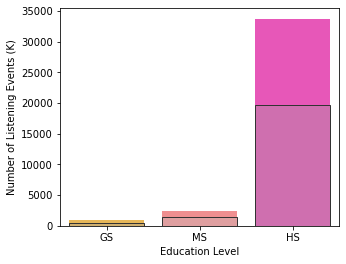

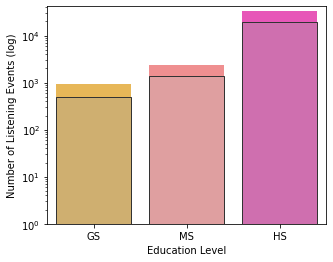

In [4]:
temp = data.groupby(['Education Level'], observed = True).agg(Total = ('Has Audio Features', 'count'), WithAudioFeatures = ('Has Audio Features', 'sum')).reset_index()

temp = temp.sort_values(by = 'Education Level')
temp['Total'] = temp['Total']/1000
temp['WithAudioFeatures'] = temp['WithAudioFeatures']/1000
temp

f, axs = plt.subplots(figsize=(5, 4))
sns.barplot(data = temp, x = 'Education Level', y = 'Total', palette = 'spring_r', ax = axs)
sns.barplot(data = temp, x = 'Education Level', y = 'WithAudioFeatures', palette = 'spring_r', ax = axs, saturation=.5, edgecolor=".2")
axs.set(ylabel = 'Number of Listening Events (K)');

plt.show();
f, axs = plt.subplots(figsize=(5, 4))
sns.barplot(data = temp, x = 'Education Level', y = 'Total', palette = 'spring_r', ax = axs)
sns.barplot(data = temp, x = 'Education Level', y = 'WithAudioFeatures', palette = 'spring_r', ax = axs, saturation=.5, edgecolor=".2")
axs.set(yscale = 'log', ylabel = 'Number of Listening Events (log)', ylim = (1, None));

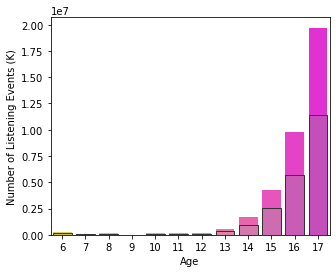

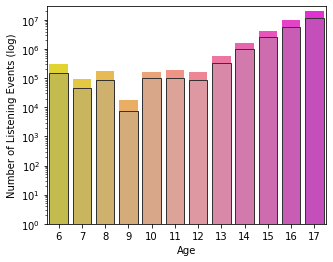

In [5]:
temp = data.groupby(['Age'], observed = True).agg(Total = ('Has Audio Features', 'count'), WithAudioFeatures = ('Has Audio Features', 'sum')).reset_index()

temp = temp.sort_values(by = 'Age')
temp

f, axs = plt.subplots(figsize=(5, 4))
sns.barplot(data = temp, x = 'Age', y = 'Total', palette = 'spring_r', ax = axs)
sns.barplot(data = temp, x = 'Age', y = 'WithAudioFeatures', palette = 'spring_r', ax = axs, saturation=.5, edgecolor=".2")
axs.set(ylabel = 'Number of Listening Events (K)');
plt.show()

f, axs = plt.subplots(figsize=(5, 4))
sns.barplot(data = temp, x = 'Age', y = 'Total', palette = 'spring_r', ax = axs)
sns.barplot(data = temp, x = 'Age', y = 'WithAudioFeatures', palette = 'spring_r', ax = axs, saturation=.5, edgecolor=".2")
axs.set(yscale = 'log', ylabel = 'Number of Listening Events (log)', ylim = (1, None));

### Users

In [6]:
print('Users')
print('Total:\t' + str(data['User Id'].nunique()))
print('With Audio Features:\t' + str(data[data['Has Audio Features']]['User Id'].nunique()))
print()

print('Missing Users from Spotify:')
temp = data.groupby(['User Id', 'Age', 'Education Level'], observed = True)['Has Audio Features'].sum().reset_index()
temp[temp['Has Audio Features'] == 0]

Users
Total:	3416
With Audio Features:	3412

Missing Users from Spotify:


,User Id,Age,Education Level,Has Audio Features
1369,37766230,17,HS,0
2689,48465800,15,HS,0
2989,49302888,16,HS,0
3399,50044176,17,HS,0


Only missing users in the groups we have the most data